# OBJETIVOS
- Desarrollar un grafo de perfiles dentro de una red social, implementando estructuras de datos para representar usuarios y conexiones, junto con algoritmos de búsqueda BFS y DFS.

- Implementar una estructura de grafo mediante POO, creando clases para nodos, aristas y el grafo completo, permitiendo el modelado preciso de conexiones en redes sociales.


# INTRODUCCIÓN

El proyecto desarrollado implementa los algoritmos BFS (Breadth-First Search) y DFS (Depth-First Search) para el análisis de conexiones en redes sociales, donde los nodos representan a los usuarios y las aristas simbolizan relaciones como amistades o seguidores. Como señala Coto (2003)[@netto2003grafos], estos algoritmos son fundamentales para resolver problemas de procesamiento de grafos, donde el BFS "es el algoritmo clásico para encontrar el camino más corto entre dos nodos específicos" (p. 13), mientras que el DFS explora conexiones profundas mediante recursividad. El algoritmo BFS se utiliza para identificar el camino más corto entre dos usuarios, como los amigos en común más cercanos, mientras que el algoritmo DFS se emplea para explorar comunidades o conexiones más profundas, como los seguidores de seguidores. La implementación basada en programación orientada a objetos (POO) aporta escalabilidad al sistema, al permitir la incorporación de atributos a los nodos, como intereses o ubicación, así como la asignación de pesos a las aristas, como la frecuencia de interacción.[@sanchez2006tutorial]

# DESAROLLO
## Importación de librerías
Vamos a importar las librerías necesarias para:

- `collections.deque`: Para implementar colas eficientes en BFS

- `networkx` y `matplotlib`: Para visualización de grafos

- `ipywidgets`: Para interactividad en el notebook

In [27]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

# Configurar matplotlib para mostrar ventanas emergentes
%matplotlib qt

## Clases Base: Arista y Nodo

Definimos las estructuras fundamentales:

- Arista: Conexión entre nodos con peso.

- Nodo: Elemento básico del grafo con nombre y tipo.

In [ ]:
class Arista:
    def __init__(self, nodo1, nodo2, peso=1):
        # Conecta dos nodos y puede tener un peso (por defecto 1)
        self.nodo1 = nodo1
        self.nodo2 = nodo2
        self.peso = peso

class Nodo:
    def __init__(self, nombre, tipo=None):
        # Cada nodo tiene un nombre y un tipo opcional 
        self.nombre = nombre
        self.tipo = tipo  # entrada, salida, edificio, etc.

    def __repr__(self):
        # Representación legible del nodo (su nombre)
        return self.nombre

## Clase Grafo: Estructura Principal
Implementación con:

- Lista de adyacencia para almacenar conexiones

- Métodos para agregar nodos y aristas

- Algoritmos BFS y DFS para búsqueda de rutas

In [ ]:
class Grafo:
    def __init__(self):
        # Diccionario de nodos por nombre
        self.nodos = {}
        # Lista de aristas (conexiones)
        self.aristas = []
        # Lista de adyacencia: mapea nodo a sus vecinos
        self.adj_list = {}

    def agregar_nodo(self, nodo):
        # Agrega nodo si no existe, y crea su lista de vecinos
        if nodo.nombre not in self.nodos:
            self.nodos[nodo.nombre] = nodo
            self.adj_list[nodo] = []

    def agregar_arista(self, nodo1, nodo2, peso=1):
        # Solo agrega arista si ambos nodos existen en el grafo
        if nodo1.nombre in self.nodos and nodo2.nombre in self.nodos:
            arista = Arista(nodo1, nodo2, peso)
            self.aristas.append(arista)
            # Añade la conexión en ambas direcciones (grafo no dirigido)
            self.adj_list[nodo1].append(nodo2)
            self.adj_list[nodo2].append(nodo1)
        else:
            raise ValueError("Uno o ambos nodos no existen")

## Algoritmo BFS (Breadth-First Search)

- Encuentra la ruta más corta 

- Usa cola (FIFO) para explorar niveles



In [ ]:
def bfs(self, inicio, fin):
    # Inicializa todos los nodos como no visitados
    visitados = {nodo: False for nodo in self.nodos.values()}
    # Cola para BFS: almacena tuplas (nodo_actual, camino_hasta_ahora)
    cola = deque([(inicio, [inicio])])
    visitados[inicio] = True

    while cola:
        actual, camino = cola.popleft()
        # Si llegamos al nodo destino, retornamos el camino encontrado
        if actual == fin:
            return camino
        # Explora todos los vecinos del nodo actual
        for vecino in self.adj_list[actual]:
            if not visitados[vecino]:
                visitados[vecino] = True
                # Agrega el vecino a la cola junto con el camino actualizado
                cola.append((vecino, camino + [vecino]))
    # Si no se encuentra ruta, retorna None
    return None

## Algoritmo DFS (Depth-First Search)

- Explora ramas completas antes de retroceder

- Implementación recursiva 

- Útil para encontrar componentes conectados

In [38]:
def dfs(self, inicio, destino):
    print("\nIniciando DFS (recursivo)...")
    # Diccionario para marcar nodos visitados
    searched = {nodo: False for nodo in self.nodos.values()}
    parents = {}      # Para reconstruir el camino
    componentR = []   # Guarda los nodos visitados en el recorrido

    def _dfs(nodo, parent=None):
        componentR.append(nodo)
        searched[nodo] = True
        parents[nodo] = parent

        print(f"Estado de búsqueda en nodo {nodo}:")
        print({n.nombre: v for n, v in searched.items()})
        print(f"Vecinos de {nodo}: {self.adj_list[nodo]}")
        print()

        if nodo == destino:
            return True  # Se encontró el destino

        # Explora recursivamente los vecinos no visitados
        for vecino in self.adj_list[nodo]:
            if not searched[vecino]:
                if _dfs(vecino, nodo):  # Si encuentra el destino en la rama
                    return True
                print(f"Finaliza {vecino}")
                print(f"Vuelve a {nodo}")
                print()

        return False  # No se encontró el destino desde este nodo

    encontrado = _dfs(inicio)

    if encontrado:
        # Reconstruye el camino desde el destino al inicio usando parents
        camino = []
        actual = destino
        while actual is not None:
            camino.append(actual)
            actual = parents.get(actual)
        camino.reverse()
        print(" Ruta encontrada con DFS:")
        print(" → ".join(n.nombre for n in camino))
        return camino
    else:
        print(" No se encontró ruta con DFS")
        return None

In [ ]:
def dfs(self, inicio, destino):
    print("\nIniciando DFS (recursivo)...")
    # Diccionario para marcar nodos visitados
    searched = {nodo: False for nodo in self.nodos.values()}
    parents = {}      # Para reconstruir el camino
    componentR = []   # Guarda los nodos visitados en el recorrido

    def _dfs(nodo, parent=None):
        componentR.append(nodo)
        searched[nodo] = True
        parents[nodo] = parent

        # Muestra el estado actual de la búsqueda
        print(f"Estado de búsqueda en nodo {nodo}:")
        print({n.nombre: v for n, v in searched.items()})
        print(f"Vecinos de {nodo}: {self.adj_list[nodo]}")
        print()

        if nodo == destino:
            return True  # Ruta encontrada

        # Explora recursivamente los vecinos no visitados
        for vecino in self.adj_list[nodo]:
            if not searched[vecino]:
                if _dfs(vecino, nodo):  # Si se encuentra el destino en la rama
                    return True
                # Mensajes de retroceso
                print(f"Finaliza {vecino}")
                print(f"Vuelve a {nodo}")
                print()

        return False  # Ruta no encontrada desde este nodo

    encontrado = _dfs(inicio)

    if encontrado:
        # Reconstrucción del camino usando el diccionario de padres
        camino = []
        actual = destino
        while actual is not None:
            camino.append(actual)
            actual = parents.get(actual)
        camino.reverse()
        print("Ruta encontrada con DFS:")
        print(" → ".join(n.nombre for n in camino))
        return camino
    else:
        print(" No se encontró ruta con DFS")
        return None

## Función de Construcción del Grafo Demo
Crea un grafo predefinido que simula una red social con:

- 14 nodos (usuarios)

- 20 conexiones bidireccionales

In [ ]:
def construir_grafo_demo():
    grafo = Grafo()
    # Diccionario de nodos con nombre y tipo
    nodos = {
        "Jairo": Nodo("Jairo", "entrada"),
        "Marco": Nodo("Marco", "punto_interes"),
        "Daniela": Nodo("Daniela", "salida"),
        "Camila": Nodo("Camila", "punto_interes"),
        "Eve": Nodo("Eve", "punto_interes"),
        "Richard": Nodo("Richard", "punto_interes"),
        "Grace": Nodo("Grace", "edificio"),
        "Estefano": Nodo("Estefano", "salida"),
        "Lenin": Nodo("Lenin", "usuario"),
        "Lorena": Nodo("Lorena", "usuario"),
        "Eddy": Nodo("Eddy", "usuario"),
        "Laura": Nodo("Laura", "usuario"),
        "Miguel": Nodo("Miguel", "usuario"),
        "Tamara": Nodo("Tamara", "usuario")
    }

    # Agrega todos los nodos al grafo
    for nodo in nodos.values():
        grafo.agregar_nodo(nodo)

    # Lista de conexiones (aristas) entre nodos
    conexiones = [
        ("Jairo", "Eve"),
        ("Eve", "Daniela"),
        ("Camila", "Richard"),
        ("Richard", "Grace"),
        ("Grace", "Daniela"),
        ("Jairo", "Marco"),
        ("Marco", "Estefano"),
        ("Estefano", "Richard"),
        ("Estefano", "Eve"),
        ("Estefano", "Camila"),
        ("Lenin", "Marco"),
        ("Lenin", "Lorena"),
        ("Lorena", "Eddy"),
        ("Eddy", "Laura"),
        ("Laura", "Eve"),
        ("Miguel", "Eddy"),
        ("Miguel", "Richard"),
        ("Tamara", "Lorena"),
        ("Tamara", "Camila"),
        ("Grace", "Tamara")
    ]

    # Agrega todas las aristas al grafo según las conexiones
    for a, b in conexiones:
        grafo.agregar_arista(nodos[a], nodos[b])

    # Retorna el grafo construido
    return grafo

## Visualización Interactiva del Grafo
Función para dibujar el grafo usando networkx y matplotlib, con capacidad para seleccionar nodos haciendo clic.
Características:

- Layout Kamada-Kawai para distribución orgánica

- Eventos de clic para selección interactiva

- Temporización para mantener la figura activa

In [ ]:
def dibujar_grafo_interactivo(grafo):
    G = nx.Graph()
    # Agrega nodos al grafo de NetworkX
    for nodo in grafo.nodos.values():
        G.add_node(nodo.nombre)
    # Agrega aristas al grafo de NetworkX
    for arista in grafo.aristas:
        G.add_edge(arista.nodo1.nombre, arista.nodo2.nombre)

    # Calcula posiciones para los nodos (layout visual)
    pos = nx.kamada_kawai_layout(G)
    fig, ax = plt.subplots(figsize=(14, 10))
    # Dibuja el grafo con colores y estilos básicos
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray',
            node_size=2000, font_size=10, width=2)
    
    plt.title(" Red Social - Selecciona dos usuarios para buscar la ruta")

    seleccionados = []

    # Función que maneja el clic sobre la figura
    def onclick(event):
        if event.inaxes is not ax:
            return
        x, y = event.xdata, event.ydata
        # Encuentra el nodo más cercano al clic
        nodo_cercano = min(pos, key=lambda n: (pos[n][0]-x)**2 + (pos[n][1]-y)**2)
        if nodo_cercano not in seleccionados:
            seleccionados.append(nodo_cercano)
            print(f"Seleccionado: {nodo_cercano}")
        # Si ya hay dos seleccionados, desconecta el evento y cierra la figura
        if len(seleccionados) == 2:
            fig.canvas.mpl_disconnect(cid)
            plt.close(fig)

    # Conecta el evento de clic a la función onclick
    cid = fig.canvas.mpl_connect('button_press_event', onclick)
    plt.show()

    # Mantiene la ventana abierta hasta que se seleccionen dos nodos
    while plt.fignum_exists(fig.number):
        plt.pause(0.1)

    return seleccionados

## Visualización de Rutas
Función para resaltar rutas encontradas:

- Nodos en rojo: Ruta encontrada

- Aristas en rojo: Conexiones utilizadas

- Diferenciación visual entre BFS/DFS

In [ ]:
def dibujar_ruta(grafo, ruta, titulo):
    G = nx.Graph()
    # Agrega nodos al grafo de NetworkX
    for nodo in grafo.nodos.values():
        G.add_node(nodo.nombre)
    # Agrega aristas al grafo de NetworkX
    for arista in grafo.aristas:
        G.add_edge(arista.nodo1.nombre, arista.nodo2.nombre)

    # Calcula posiciones para los nodos (layout visual)
    pos = nx.kamada_kawai_layout(G)

    fig, ax = plt.subplots(figsize=(14, 10))

    # Prepara la lista de nombres de los nodos en la ruta encontrada
    nombres_ruta = [n.nombre for n in ruta]
    # Colorea de rojo los nodos que están en la ruta, azul claro los demás
    colores_nodos = ['red' if nodo in nombres_ruta else 'lightblue' for nodo in G.nodes()]
    # Prepara las aristas que forman parte de la ruta encontrada
    aristas_ruta = list(zip(nombres_ruta[:-1], nombres_ruta[1:]))
    # Colorea de rojo las aristas de la ruta, gris las demás
    colores_aristas = ['red' if (u, v) in aristas_ruta or (v, u) in aristas_ruta else 'gray' for u, v in G.edges()]

    # Dibuja el grafo resaltando la ruta encontrada
    nx.draw(G, pos, with_labels=True, node_color=colores_nodos, edge_color=colores_aristas,
            node_size=2000, font_size=10, width=2, ax=ax)

    # Título informativo según el algoritmo utilizado
    if "BFS" in titulo:
        plt.title(" BFS - Ruta más corta entre dos usuarios en la red social")
    elif "DFS" in titulo:
        plt.title("🔶 DFS - Ruta profunda entre dos usuarios en la red social")
    else:
        plt.title(f" Ruta encontrada - {titulo}")

    plt.show()

## Función Principal de Simulación
Orquesta todo el flujo:

- Construye el grafo demo

- Permite selección interactiva

- Ejecuta BFS y DFS

- Visualiza resultados

In [ ]:
def ejecutar_simulacion():
    # Construye el grafo de ejemplo con usuarios y conexiones
    grafo = construir_grafo_demo()
    
    print(" Haz clic en el nodo de inicio y luego en el de destino...")
    # Permite seleccionar dos nodos de forma interactiva
    seleccionados = dibujar_grafo_interactivo(grafo)
    
    if len(seleccionados) != 2:
        print("❌ Debes seleccionar exactamente 2 nodos")
        return
    
    inicio, fin = seleccionados
    nodo_inicio = grafo.nodos[inicio]
    nodo_fin = grafo.nodos[fin]
    
    print(f"\nRuta desde {inicio} hasta {fin}:")
    
    # Ejecuta BFS para encontrar la ruta más corta
    print("\n Ejecutando BFS (Ruta más corta)...")
    ruta_bfs = grafo.bfs(nodo_inicio, nodo_fin)
    if ruta_bfs:
        print(" → ".join(n.nombre for n in ruta_bfs))
        dibujar_ruta(grafo, ruta_bfs, "BFS - Ruta más corta")
    else:
        print("No se encontró ruta con BFS")
    
    # Ejecuta DFS para encontrar una ruta profunda
    print("\n🔶 Ejecutando DFS (Ruta más profunda)...")
    ruta_dfs = grafo.dfs(nodo_inicio, nodo_fin)
    if ruta_dfs:
        print(" → ".join(n.nombre for n in ruta_dfs))
        dibujar_ruta(grafo, ruta_dfs, "DFS - Ruta más profunda")
    else:
        print("No se encontró ruta con DFS")

# Ejecutar la simulación
print("=== Simulador de Conexiones en Red Social ===")
ejecutar_simulacion()

## Resultados

=== Simulador de Conexiones en Red Social ===
🔵 Haz clic en el nodo de inicio y luego en el de destino...

Seleccionado: Daniela

Seleccionado: Eddy

Ruta desde Daniela hasta Eddy:

🔷 Ejecutando BFS (Ruta más corta)...
Daniela → Eve → Laura → Eddy

🔶 Ejecutando DFS (Ruta más profunda)...

Iniciando DFS (recursivo)...
Estado de búsqueda en nodo Daniela:
{'Jairo': False, 'Marco': False, 'Daniela': True, 'Camila': False, 'Eve': False, 'Richard': False, 'Grace': False, 'Estefano': False, 'Lenin': False, 'Lorena': False, 'Eddy': False, 'Laura': False, 'Miguel': False, 'Tamara': False}
Vecinos de Daniela: [Eve, Grace]

Estado de búsqueda en nodo Eve:
{'Jairo': False, 'Marco': False, 'Daniela': True, 'Camila': False, 'Eve': True, 'Richard': False, 'Grace': False, 'Estefano': False, 'Lenin': False, 'Lorena': False, 'Eddy': False, 'Laura': False, 'Miguel': False, 'Tamara': False}
Vecinos de Eve: [Jairo, Daniela, Estefano, Laura]

Estado de búsqueda en nodo Jairo:
{'Jairo': True, 'Marco': False, 'Daniela': True, 'Camila': False, 'Eve': True, 'Richard': False, 'Grace': False, 'Estefano': False, 'Lenin': False, 'Lorena': False, 'Eddy': False, 'Laura': False, 'Miguel': False, 'Tamara': False}
Vecinos de Jairo: [Eve, Marco]

Estado de búsqueda en nodo Marco:
{'Jairo': True, 'Marco': True, 'Daniela': True, 'Camila': False, 'Eve': True, 'Richard': False, 'Grace': False, 'Estefano': False, 'Lenin': False, 'Lorena': False, 'Eddy': False, 'Laura': False, 'Miguel': False, 'Tamara': False}
...

✅ Ruta encontrada con DFS:
Daniela → Eve → Jairo → Marco → Estefano → Richard → Camila → Tamara → Lorena → Eddy
Daniela → Eve → Jairo → Marco → Estefano → Richard → Camila → Tamara → Lorena → Eddy

- BFS

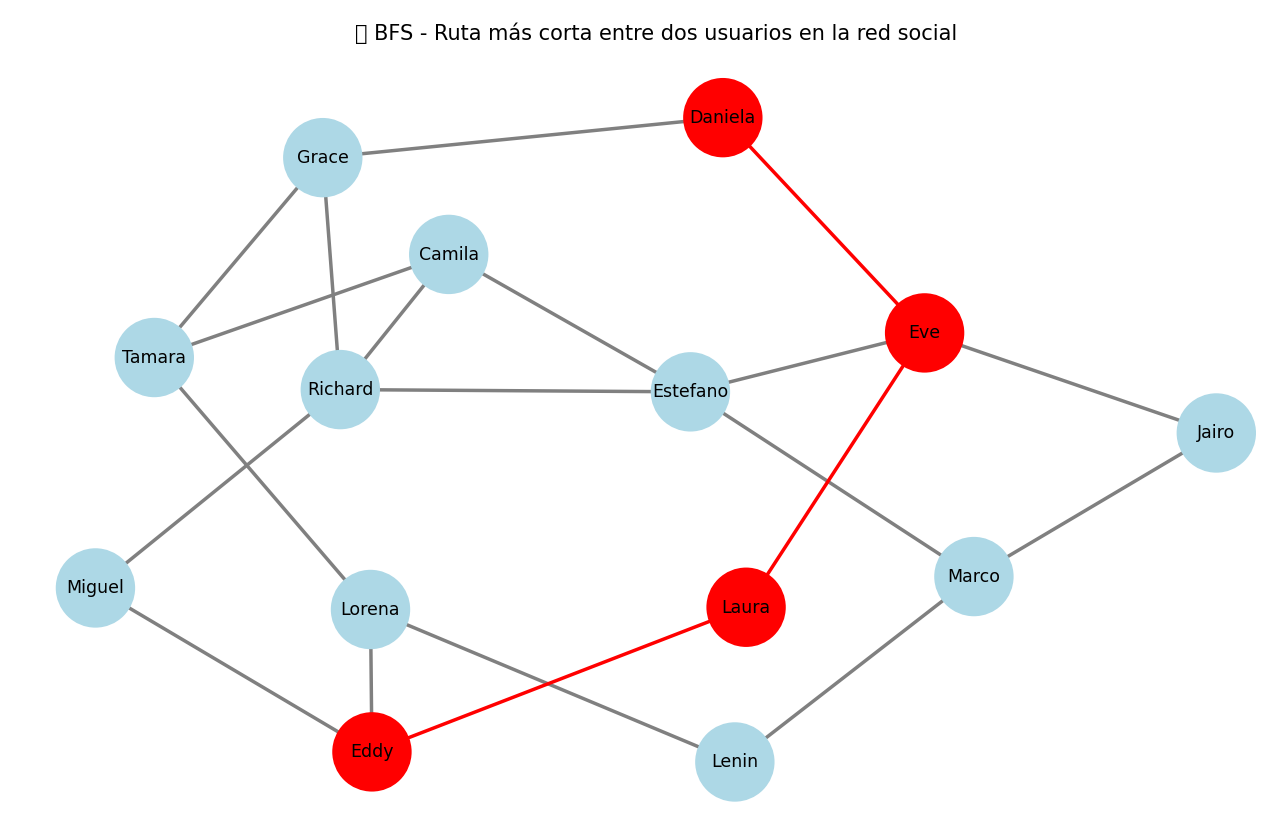

- DFS

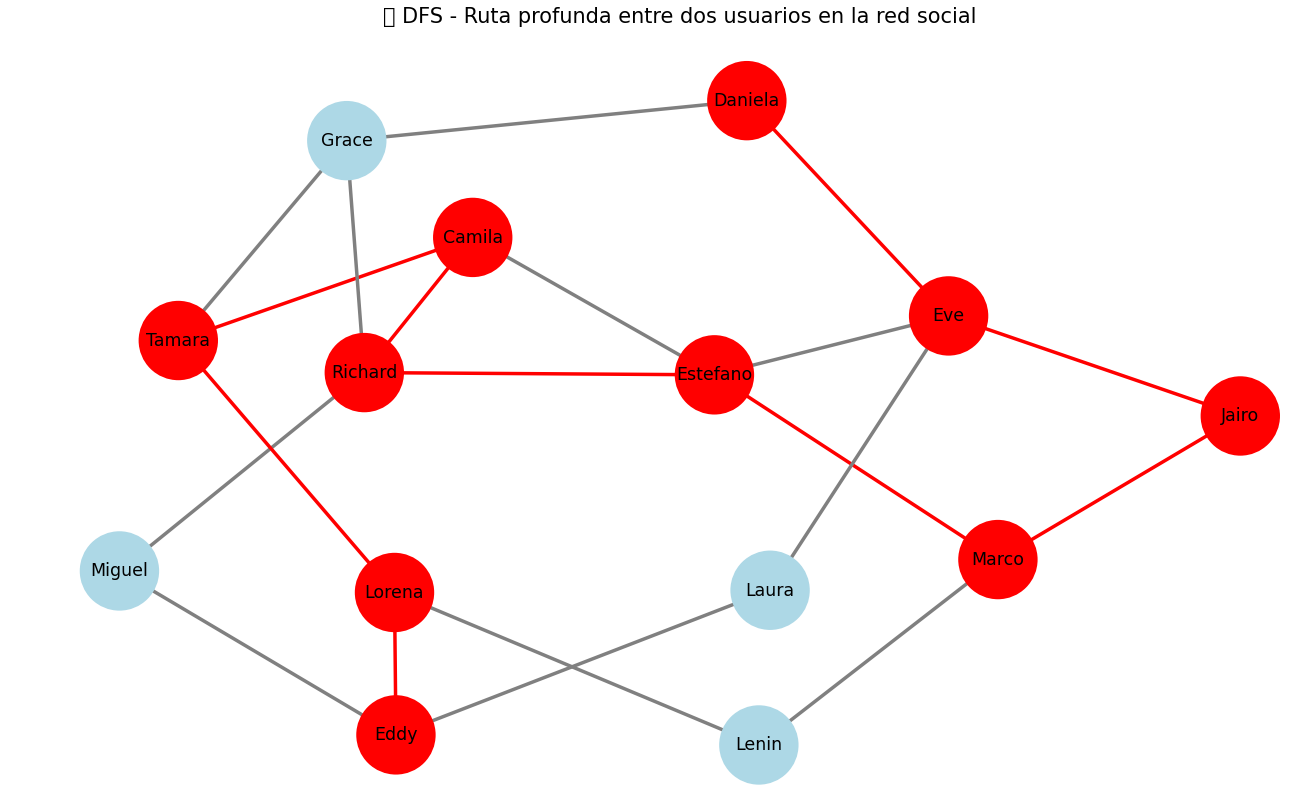

# VIDEO DE LA PRESENTACIÓN DEL PROYECTO

[Presentación del Proyecto](https://youtu.be/V-3R4NrqpK8)

# CONCLUSIONES
- Se implementaron los algoritmos BFS y DFS para analizar conexiones en un grafo que simula una red social. El BFS demostró ser eficaz para identificar el camino más corto entre usuarios, mientras que el DFS permitió explorar conexiones profundas. Estas implementaciones, validadas mediante pruebas con grafos predefinidos, confirmaron su precisión y robustez en el análisis de relaciones.

- Se desarrolló un sistema de visualización interactiva utilizando las librerías NetworkX y Matplotlib, en el cual la programación orientada a objetos (POO) se usó para garantizar su escalabilidad y mantenimiento. Las clases Grafo, Nodo y Arista encapsulan la lógica principal del sistema, facilitando su extensión y reutilización.

# DECLARACIÓN DE USO DE IA

Se usó ChatGPT para consultar conceptos clave sobre algoritmos de grafos BFS y DFS, implementación de la programación orientada a objetos python y el uso de las librerías NetworkX y Matplotlib.

Sin embargo, me hago responsable de los contenidos expuestos en este informe.



# BIBLIOGRAFÍA

